# Introduction
Welcome to Kotlin notebook, in this environment you can run kotlin code dynamically.

## Hello World !
Let's start with the famous : "Hello World"
The last instruction of a cell code will be printed as output

In [6]:
val greeting = "Hello World!!"
greeting

Hello World!!

## Notebook Outputs
You can use several output formats.

### HTML  

In [7]:
HTML("<h1>$greeting</h1>")

Hello World!!

In [8]:
HTML("<img src='https://picsum.photos/200' />")

### Latex

In [9]:
%use lib-ext
LATEX("F_n = F_{n-1} + F_{n-2}")

### Image Output

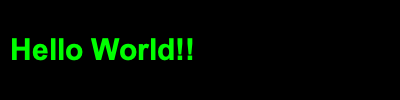

In [10]:
import java.awt.Color
import java.awt.Font
import java.awt.image.BufferedImage

val image = BufferedImage(400,100,BufferedImage.TYPE_INT_ARGB)
val g = image.graphics
g.color = Color.BLACK
g.fillRect(0,0,400,100)
g.color = Color.GREEN
g.font = Font("Arial",Font.BOLD,30)
g.drawString(greeting,10, 60)
image

## Dependencies

You can use any maven dependencies in your notebook 

- With `%use` you can use predefined dependencies 
- With `@file:DependsOn("<group>:<artifact>:<version>")` you can use any maven dependency
- With USE block
```
USE {
    dependencies("<group>:<artifact>:<version>")
}
```

## IMDB scraping example
The following example shows how to scrap [IMDB Top movies](https://www.imdb.com/chart/top/) with [jsoup](https://jsoup.org/) and display results in a simple html table.

In [11]:
@file:DependsOn("org.jsoup:jsoup:1.17.2")

data class Movie(val rank:Int, val title:String, val year:Int, val rating:Float){
    fun toTableRow():String = "<tr><td>$rank</td><td>$title</td><td>$year</td><td>$rating</td></tr>"
}


In [12]:
import org.jsoup.Jsoup

val movies = Jsoup.connect("https://www.imdb.com/chart/top").get()
    .select("li.ipc-metadata-list-summary-item").map {
        val title = it.select("h3.ipc-title__text").text().substringAfter(". ")
        val rank = it.select("h3.ipc-title__text").text().substringBefore(". ").toInt()
        val year = it.select("span.cli-title-metadata-item:first-child").text().toInt()
        val rating = it.select("span.ipc-rating-star--rating").text().toFloat()
        Movie(rank, title, year, rating)
    }

HTML("""
<h3>Top ${movies.size} IMDB movies</h3>
<table>
    <thead>
        <th>Rank</th><th>Title</th><th>Year</th><th>Rating</th>
    </thead>
    <tbody>
        ${movies.map { it.toTableRow() }.joinToString("\n")}
    </tbody>
</table>
""".trimIndent())


1,Les Évadés,1994,9.3
2,Le Parrain,1972,9.2
3,The Dark Knight : Le Chevalier noir,2008,9.0
4,"Le Parrain, 2ᵉ partie",1974,9.0
5,12 Hommes en colère,1957,9.0
6,Le Seigneur des anneaux : Le Retour du roi,2003,9.0
7,La Liste de Schindler,1993,9.0
8,Pulp Fiction,1994,8.9
9,Le Seigneur des anneaux : La Communauté de l'anneau,2001,8.9
10,"Le Bon, la Brute et le Truand",1966,8.8
11,Forrest Gump,1994,8.8
